In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import sympy as sym
from scipy import constants as const

## Wczytanie danych

In [2]:
data1 = pd.read_csv("tab1.txt", delimiter = "\t")
data2 = pd.read_csv("tab2.txt", delimiter = " ")
data3 = pd.read_csv("tab3.txt", delimiter = " ")

I_t = 11.4 #mikroA 

data1.head()

,Lambda,I
0,0,11.4
1,373,11.5
2,376,11.6
3,379,11.7
4,382,11.6


## Niepewności

In [3]:
def calc_Dp_multimetr_I(rdg, dgt):
    return 1.4/100 * rdg + 3 * dgt

def calc_Dp_multimetr_U(rdg, dgt):
    if (dgt == 0.0001):
        return 0.28/100 * rdg + 2 * dgt
    else:
        return 0.38/100 * rdg + 2 * dgt

def calc_res_U(Zakres_U):
    res_U = {1.1:0.0001, 11.:0.001, 110.:0.01}
    return res_U[Zakres_U]

def calc_uA(series, mean):
    s = 0
    for x in series:
        s += (x - mean)**2
    s /= len(series)*(len(series)-1)
    return np.sqrt(s)

def calc_uB(Deltas):
    s = 0
    for D in Deltas:
        s += D**2 / 3
    return np.sqrt(s)

#Zakres_I = 400
res_I = 0.1
u_I_t = calc_uB([calc_Dp_multimetr_I(I_t, res_I)])
u_Lambda = 2/np.sqrt(3)

data2['uU'] = data2.apply(lambda row: calc_uB([ calc_Dp_multimetr_U(row['U'],calc_res_U(row['Zakres_U'])) ]), axis=1)
data3['uU'] = data3.apply(lambda row: calc_uB([ calc_Dp_multimetr_U(row['U'],calc_res_U(row['Zakres_U'])) ]), axis=1)

data1['uI'] = data1.apply(lambda row: calc_uB([ calc_Dp_multimetr_I(row['I'], res_I) ]), axis=1)
data2['uI'] = data2.apply(lambda row: calc_uB([ calc_Dp_multimetr_I(row['I'], res_I) ]), axis=1)
data3['uI'] = data3.apply(lambda row: calc_uB([ calc_Dp_multimetr_I(row['I'], res_I) ]), axis=1)

data1.loc[30:40]

,Lambda,I,uI
30,460,14.5,0.290407
31,463,14.7,0.292024
32,466,14.9,0.293640
33,469,15.0,0.294449
34,472,15.2,0.296065
35,475,15.3,0.296874
36,478,15.5,0.298490
37,481,15.6,0.299298
38,484,15.8,0.300915
39,487,15.9,0.301723


## Tabela 1

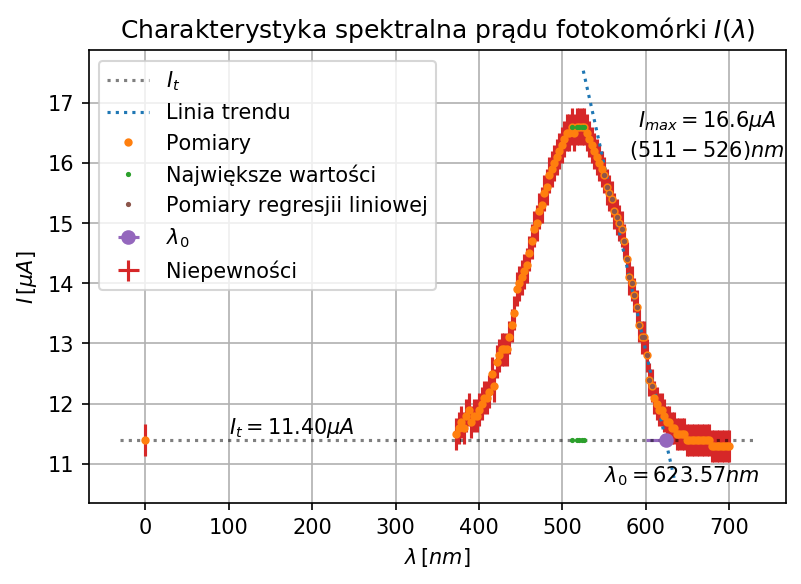

In [15]:
plt.rcParams['figure.dpi'] = 150
x = data1['Lambda']
y = data1['I']
xerr = u_Lambda * np.ones(len(x))
yerr = data1['uI']

x0 = np.linspace(x[0]-30,x[len(x)-1]+30,1000)
y0 = np.ones(len(x0)) * I_t
plt.plot(x0,y0,":", color='black', label="$I_t$", alpha=0.5)
plt.text(100, I_t + 0.1, "$I_t = %.2f \mu A$" % I_t)

start = 60
end = 80
p, V = np.polyfit(x[start:end], y[start:end], 1, full=False, cov=True)

x0 = np.linspace(x[start]-25, x[end]+25, 100)
plt.plot(x0, p[0]*x0 + p[1],':', label="Linia trendu")

plt.plot(x,y,'.', label='Pomiary')
plt.plot(x[y==y.max()],np.ones(len(x[y==y.max()])) * y.max(), '.', label="Największe wartości", markersize=3)
plt.plot(x[y==y.max()],np.ones(len(x[y==y.max()])) * I_t, '.', color="C2", markersize=3)
plt.text(590, y.max(), "$I_{max} = %.1f \mu A$" % y.max())
plt.text(580, y.max()-0.5, "$(%.0f - %.0f) nm$" % (x[y==y.max()].iloc[0], x[y==y.max()].iloc[-1]))


plt.plot(x[start:end], y[start:end],'.', label='Pomiary regresjii liniowej', color="C5", markersize=3)

Lambda_0 = (-p[1]+I_t)/p[0]
#Lambda_0 = (-p[1])/p[0]
u_Lambda_0 = np.sqrt((-(-p[1]+I_t)/p[0]**2)**2 * V[0][0]  +  (1/p[0])**2 * V[1][1]  +  (1/p[0])**2 * u_I_t**2)

W = const.h * const.c / (Lambda_0 * 1e-9)
u_W = const.h * const.c * (u_Lambda_0*1e-9) / (Lambda_0*1e-9)**2

plt.errorbar(x=Lambda_0, y=I_t, xerr=u_Lambda_0, fmt="o", color='C4', label="$\lambda_0$")
plt.text(550,10.7,"$\lambda_0 = {:.2f} nm$".format(Lambda_0))
#plt.plot(Lambda_0, 0, "D", color='C4', label="$\lambda_0$")

plt.errorbar(x=x, y=y,xerr=xerr, yerr=yerr, fmt="none", label='Niepewności', color='C3')
plt.title("Charakterystyka spektralna prądu fotokomórki $I(\lambda)$")
plt.xlabel("$\lambda\, [nm]$")
plt.ylabel("$I\, [\mu A]$")
plt.grid(axis="both")
plt.legend()
plt.savefig("I_Lambda",dpi=600)
plt.show()

19.87917081535432


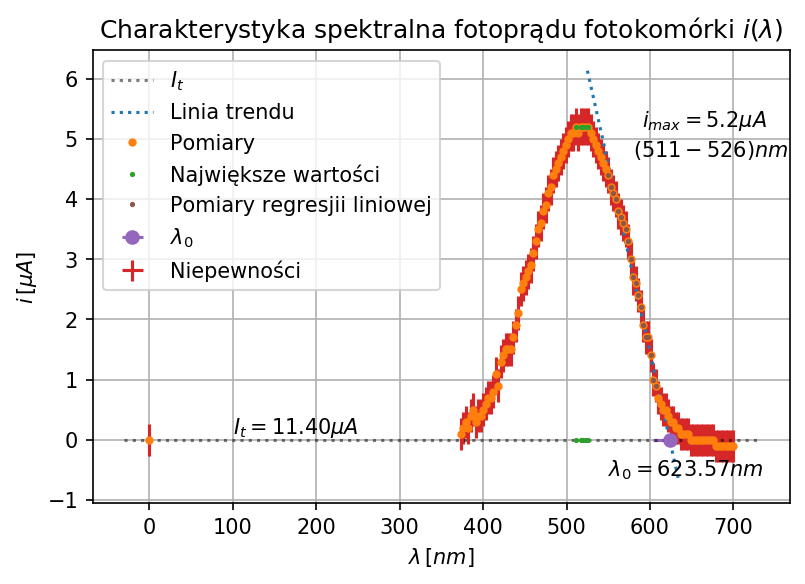

In [20]:
plt.rcParams['figure.dpi'] = 150
x = data1['Lambda']
y = data1['I'] - I_t
xerr = u_Lambda * np.ones(len(x))
yerr = data1['uI']

x0 = np.linspace(x[0]-30,x[len(x)-1]+30,1000)
y0 = np.ones(len(x0)) * 0
plt.plot(x0,y0,":", color='black', label="$I_t$", alpha=0.5)
plt.text(100, 0.1, "$I_t = %.2f \mu A$" % I_t)

start = 60
end = 80
p, V = np.polyfit(x[start:end], y[start:end], 1, full=False, cov=True)

x0 = np.linspace(x[start]-25, x[end]+25, 100)
plt.plot(x0, p[0]*x0 + p[1],':', label="Linia trendu")

plt.plot(x,y,'.', label='Pomiary')
plt.plot(x[y==y.max()],np.ones(len(x[y==y.max()])) * y.max(), '.', label="Największe wartości", markersize=3)
plt.plot(x[y==y.max()],np.ones(len(x[y==y.max()])) * 0, '.', color="C2", markersize=3)
plt.text(590, y.max(), "$i_{max} = %.1f \mu A$" % y.max())
plt.text(580, y.max()-0.5, "$(%.0f - %.0f) nm$" % (x[y==y.max()].iloc[0], x[y==y.max()].iloc[-1]))


plt.plot(x[start:end], y[start:end],'.', label='Pomiary regresjii liniowej', color="C5", markersize=3)

Lambda_0 = (-p[1])/p[0]
#Lambda_0 = (-p[1])/p[0]
u_Lambda_0 = np.sqrt((-(-p[1]+I_t)/p[0]**2)**2 * V[0][0]  +  (1/p[0])**2 * V[1][1])
print(u_Lambda_0)
W = const.h * const.c / (Lambda_0 * 1e-9)
u_W = const.h * const.c * (u_Lambda_0*1e-9) / (Lambda_0*1e-9)**2

plt.errorbar(x=Lambda_0, y=0, xerr=u_Lambda_0, fmt="o", color='C4', label="$\lambda_0$")
plt.text(550,-0.6,"$\lambda_0 = {:.2f} nm$".format(Lambda_0))
#plt.plot(Lambda_0, 0, "D", color='C4', label="$\lambda_0$")

plt.errorbar(x=x, y=y,xerr=xerr, yerr=yerr, fmt="none", label='Niepewności', color='C3')
plt.title("Charakterystyka spektralna fotoprądu fotokomórki $i(\lambda)$")
plt.xlabel("$\lambda\, [nm]$")
plt.ylabel("$i\, [\mu A]$")
plt.grid(axis="both")
plt.legend()
plt.savefig("i_Lambda_0",dpi=600)
plt.show()

In [21]:
print(p[0],p[1])
print(np.sqrt(V[0][0]), np.sqrt(V[1][1]))
print(W, u_W)
print(W/const.e, u_W/const.e)
print(Lambda_0, u_Lambda_0)

-0.062230576441103004 38.80538847117809
0.0017010428777409295 0.9844931693700741
3.185580034876684e-19 1.0155436027993421e-20
1.9882826695103857 0.0633852461238267
623.5743052758759 19.87917081535432


(1.906642294555887, 2.3082551288306723)


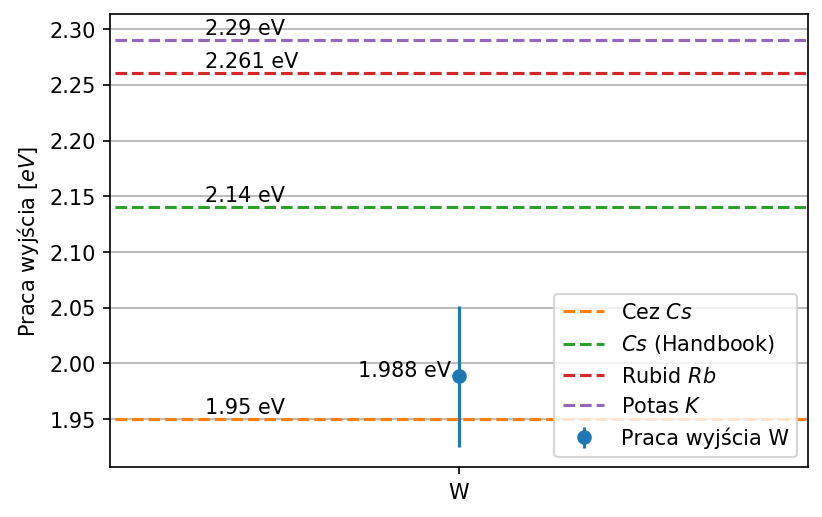

In [29]:
x = 'W'
y = W/const.e
yerr = u_W/const.e

plt.errorbar(x=x, y=y, yerr=yerr, fmt='o', label='Praca wyjścia W')
plt.text(-0.016,y, "{:.3f} eV".format(y))

plt.xlim(plt.xlim())

x0 = np.linspace(-1,1,100)
y0 = 1.95 * np.ones(len(x0))
plt.plot(x0, y0,'--', label="Cez $Cs$")
plt.text(-0.04, y0[0]+0.005, "{:.2f} eV".format(y0[0]))

y0 = 2.14 * np.ones(len(x0))
plt.plot(x0, y0,'--', label="$Cs$ (Handbook)")
plt.text(-0.04, y0[0]+0.005, "{:.2f} eV".format(y0[0]))

y0 = 2.261 * np.ones(len(x0))
plt.plot(x0, y0,'--', label="Rubid $Rb$")
plt.text(-0.04, y0[0]+0.005, "{:.3f} eV".format(y0[0]))

y0 = 2.29 * np.ones(len(x0))
plt.plot(x0, y0,'--', label="Potas $K$")
plt.text(-0.04, y0[0]+0.005, "{:.2f} eV".format(y0[0]))

print(plt.ylim())
plt.ylim(top=plt.ylim()[1] +0.005)
plt.ylabel("Praca wyjścia $[eV]$")

plt.legend(loc=4)
plt.grid(b=True, axis='y')
plt.savefig("W_Cs.png", dpi=600)
plt.show()

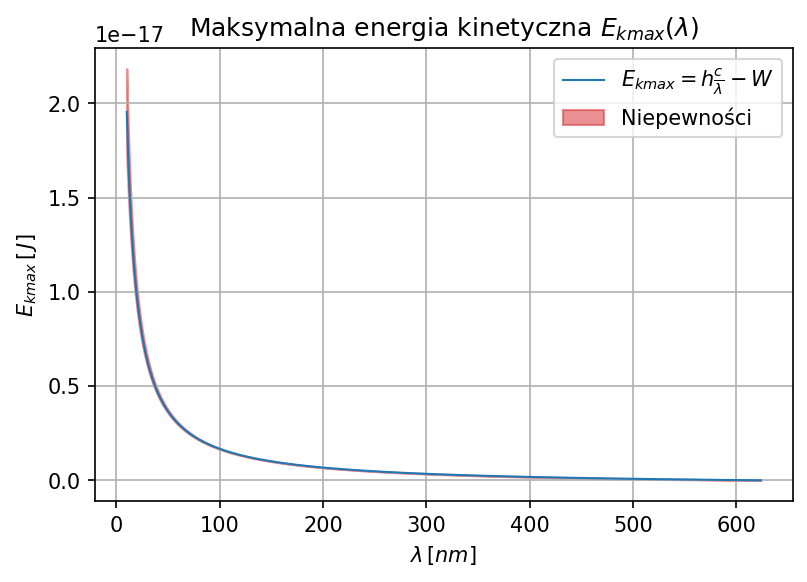

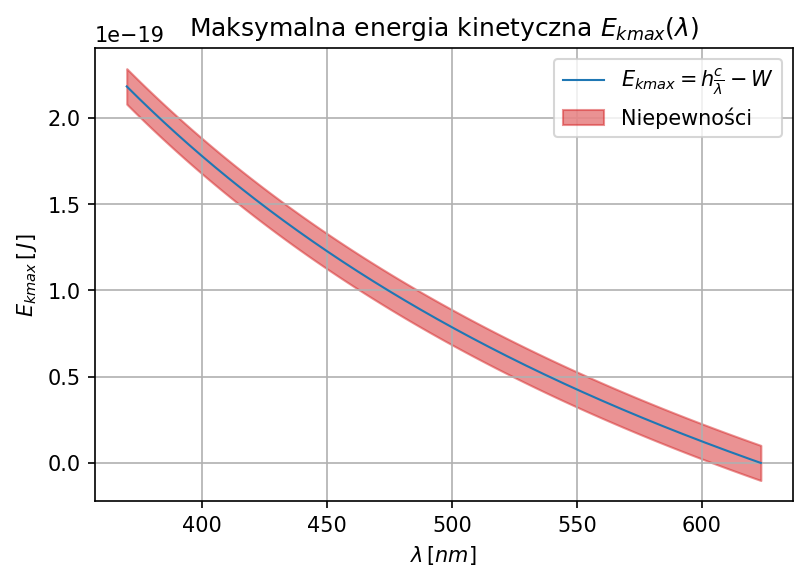

In [8]:
def plotEnergy(start_L):
    plt.rcParams['figure.dpi'] = 150

    x = np.linspace(start_L, Lambda_0,1000)
    y = const.h * const.c / (x*1e-9) - W
    yerr = np.sqrt( (const.h * const.c / (x*1e-9)**2)**2 * (u_Lambda*1e-9)**2  +  1 * u_W**2)

    plt.plot(x,y, label=r'$E_{kmax} = h \frac{c}{\lambda} - W$', linewidth=1)
    #plt.plot(x,yerr)

    plt.fill_between(x, y-yerr, y+yerr, alpha=0.5, color="C3", label="Niepewności")

    plt.grid(b=True, axis="both")
    plt.title("Maksymalna energia kinetyczna $E_{kmax} (\lambda)$")
    plt.legend()
    plt.xlabel("$\lambda \, [nm]$")
    plt.ylabel(r"$E_{kmax} \, [\,J]$")
    plt.savefig("E_kmax_{}".format(start_L), dpi=600)
    plt.show()

plotEnergy(10)
plotEnergy(370)


In [9]:
print(W/const.e, u_W/const.e)
const.h * const.c / (370*1e-9) - W
np.sqrt( (const.h * const.c / (370*1e-9)**2)**2 * (u_Lambda*1e-9)**2  +  1 * u_W**2)
u_Lambda

1.9882826695103857 0.0633852461238267


1.1547005383792517

## Tabela 2 i 3

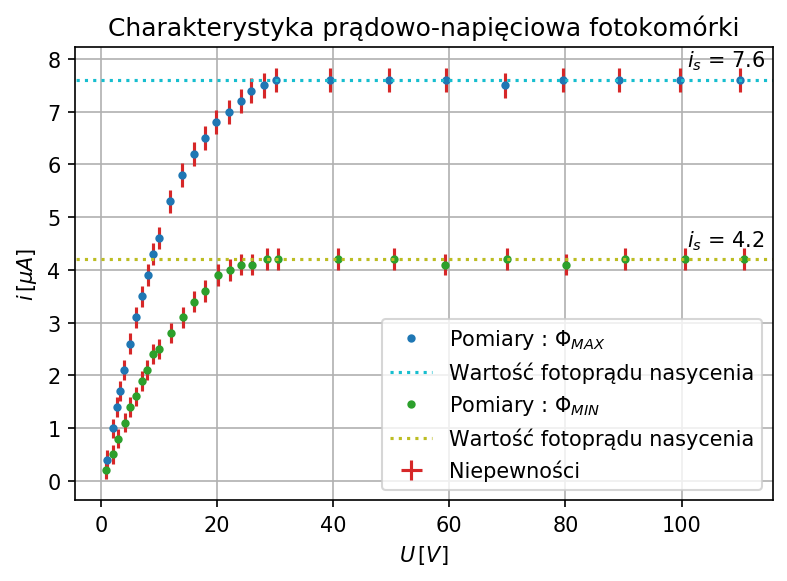

In [22]:
data = data2

x = data['U']
y = data['I']
xerr = data['uU']
yerr = data['uI']

plt.errorbar(x=x, y=y, xerr=xerr, yerr=yerr, fmt='none', label='Niepewności', color='C3')

I_nasycenia = y.iloc[-1]
U_I_nasycenia = x.iloc[-1]

I_s_max = I_nasycenia
#plt.plot(U_I_nasycenia, I_nasycenia,'o', label="Wartość fotoprądu nasycenia")
#plt.text(U_I_nasycenia-22, I_nasycenia-0.6, "({:.1f}$V$, {:.1f}$\mu A$)".format(x.iloc[-1], y.iloc[-1]))

plt.plot(x,y,'.', label="Pomiary : $\Phi_{MAX}$")

plt.xlim(plt.xlim())
x0 = np.linspace(-10,120,130)
y0 = np.ones(len(x0)) * I_nasycenia
plt.plot(x0,y0,':', label="Wartość fotoprądu nasycenia", color="C9")
plt.text(101, I_nasycenia+0.25, "$i_s$ = {:.1f}".format(I_nasycenia))

data = data3

x = data['U']
y = data['I']
xerr = data['uU']
yerr = data['uI']

plt.errorbar(x=x, y=y, xerr=xerr, yerr=yerr, fmt='none', color='C3')

I_nasycenia = y.iloc[-1]
U_I_nasycenia = x.iloc[-1]

I_s_min = I_nasycenia
#plt.plot(U_I_nasycenia, I_nasycenia,'o', label="Wartość fotoprądu nasycenia")
#plt.text(U_I_nasycenia-22, I_nasycenia-0.6, "({:.1f}$V$, {:.1f}$\mu A$)".format(x.iloc[-1], y.iloc[-1]))

plt.plot(x,y,'.', label="Pomiary : $\Phi_{MIN}$", color="C2")

plt.xlim(plt.xlim())
x0 = np.linspace(-10,120,130)
y0 = np.ones(len(x0)) * I_nasycenia
plt.plot(x0,y0,':', label="Wartość fotoprądu nasycenia", color="C8")
plt.text(101, I_nasycenia+0.25, "$i_s$ = {:.1f}".format(I_nasycenia))


plt.legend()
plt.xlabel('$U\, [V]$')
plt.ylabel('$i\, [\mu A]$')
plt.title("Charakterystyka prądowo-napięciowa fotokomórki")
plt.grid(b=True, axis='both')
plt.savefig("char_I_V", dpi=600)
plt.show()

In [28]:
print((0.28/100 * 1.0243 + 2 * 0.0001))
print(np.sqrt((0.28/100 * 1.0243 + 2 * 0.0001)**2/3))
print(I_s_max, I_s_min)
data1

0.0030680400000000006
0.0017713337198845397
7.6 4.2


,Lambda,I,uI
0,0,11.4,0.265350
1,373,11.5,0.266158
2,376,11.6,0.266967
3,379,11.7,0.267775
4,382,11.6,0.266967
...,...,...,...
106,688,11.3,0.264542
107,691,11.3,0.264542
108,694,11.3,0.264542
109,697,11.3,0.264542


In [12]:
def round_2significant(x, u):
    i = 0
    while (u <= 10):
        u *= 10
        i += 1
    while (100 < u):
        u *= 0.1
        i -= 1
    #now 10 <= u < 100
    ten_pow = 10 ** i
    u = np.ceil(u) / ten_pow
    if (x is not None):
        x = x.round(i+1)
    return x, u

def latex_round(x):
    return str(x)

In [13]:
u_Lambda

1.1547005383792517

In [14]:
wynik1 = pd.DataFrame()
wynik2 = pd.DataFrame()
wynik3 = pd.DataFrame()


wynik1 = data1.copy()
wynik1['I'] = data1.apply(lambda row: round_2significant(x=row['I'], u=row['uI'])[0], axis=1)
wynik1['uI'] = data1.apply(lambda row: round_2significant(x=row['I'], u=row['uI'])[1], axis=1)


wynik2[['Zakres_U', 'U', 'uU', 'I', 'uI']] = data2.copy()
wynik2['U'] = data2.apply(lambda row: round_2significant(x=row['U'], u=row['uI'])[0], axis=1)
wynik2['uU'] = data2.apply(lambda row: round_2significant(x=row['U'], u=row['uU'])[1], axis=1)
wynik2['I'] = data2.apply(lambda row: round_2significant(x=row['I'], u=row['uI'])[0], axis=1)
wynik2['uI'] = data2.apply(lambda row: round_2significant(x=row['I'], u=row['uI'])[1], axis=1)

wynik3[['Zakres_U', 'U', 'uU', 'I', 'uI']] = data3.copy()
wynik3['U'] = data3.apply(lambda row: round_2significant(x=row['U'], u=row['uI'])[0], axis=1)
wynik3['uU'] = data3.apply(lambda row: round_2significant(x=row['U'], u=row['uU'])[1], axis=1)
wynik3['I'] = data3.apply(lambda row: round_2significant(x=row['I'], u=row['uI'])[0], axis=1)
wynik3['uI'] = data3.apply(lambda row: round_2significant(x=row['I'], u=row['uI'])[1], axis=1)

print(wynik3.to_latex(index=False, longtable=True, float_format=latex_round, escape=False, caption='Caption', label="tab:tab3"))


\begin{longtable}{rrrrr}
\caption{Caption}\label{tab:tab3}\\
\toprule
 Zakres_U &      U &     uU &   I &   uI \\
\midrule
\endhead
\midrule
\multicolumn{5}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
      1.1 &  0.918 & 0.0016 & 0.2 & 0.18 \\
     11.0 &  1.984 & 0.0056 & 0.5 & 0.18 \\
     11.0 &  2.957 & 0.0077 & 0.8 & 0.18 \\
     11.0 &   4.06 &  0.011 & 1.1 & 0.19 \\
     11.0 &  5.026 &  0.013 & 1.4 & 0.19 \\
     11.0 &  5.965 &  0.015 & 1.6 & 0.19 \\
     11.0 &  7.071 &  0.017 & 1.9 & 0.19 \\
     11.0 &  7.947 &  0.019 & 2.1 &  0.2 \\
     11.0 &  9.004 &  0.021 & 2.4 &  0.2 \\
     11.0 &  9.985 &  0.024 & 2.5 &  0.2 \\
    110.0 &  12.05 &  0.038 & 2.8 &  0.2 \\
    110.0 &  14.07 &  0.043 & 3.1 &  0.2 \\
    110.0 &  16.03 &  0.047 & 3.4 & 0.21 \\
    110.0 &  17.93 &  0.051 & 3.6 & 0.21 \\
    110.0 &   20.2 &  0.056 & 3.9 & 0.21 \\
    110.0 &  22.21 &  0.061 & 4.0 & 0.21 \\
    110.0 &  24.17 &  0.065 & 4.1 & 0.21 \\
    110.0 &  26.04 